# bar chart results plotting


### plot

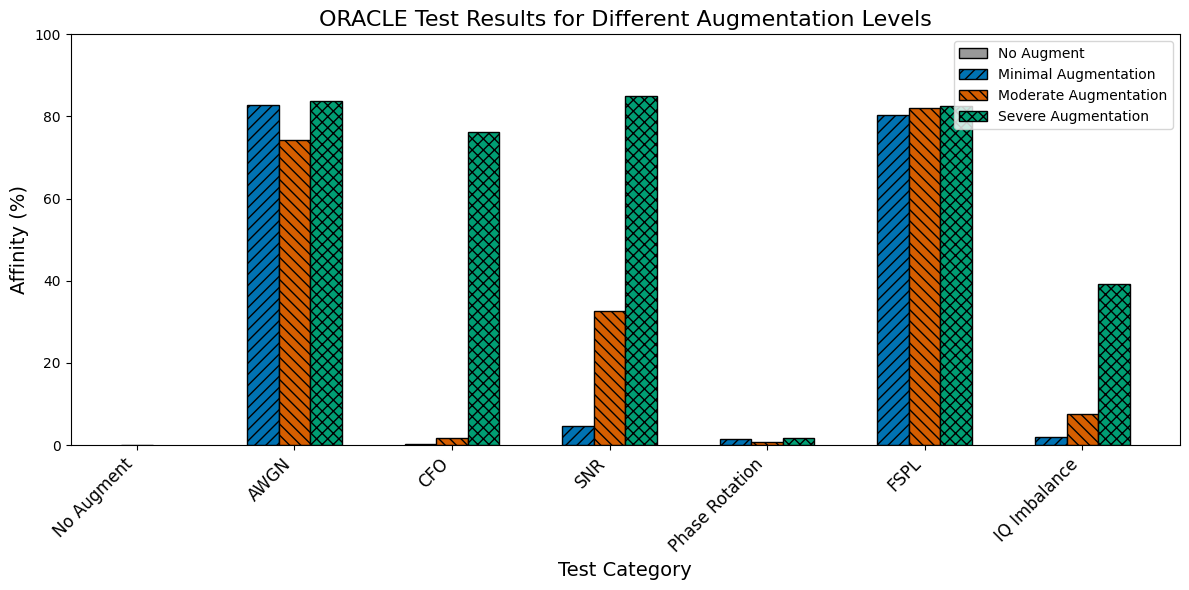

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original model accuracy
original_accuracy = 99.7

# Data from the table, including No Augment
categories = ['No Augment', 'AWGN', 'CFO', 'SNR', 'Phase Rotation', 'FSPL', 'IQ Imbalance']
no_augment = [0]  # Affinity is 0 for No Augment

# Augmented accuracies
augmented_accuracies_low = [17, 99.33, 95, 98.3, 19.3, 97.83]
augmented_accuracies_medium = [25.33, 98, 67, 99, 17.67, 92.17]
augmented_accuracies_high = [16, 23.5, 14.83, 98, 17.17, 60.5]

# Calculate affinities
affinity_low = [original_accuracy - acc for acc in augmented_accuracies_low]
affinity_medium = [original_accuracy - acc for acc in augmented_accuracies_medium]
affinity_high = [original_accuracy - acc for acc in augmented_accuracies_high]

# Bar width and positions
bar_width = 0.2
index_no_augment = np.array([0])  # Position for the No Augment bar
index = np.arange(1, len(categories))  # Positions for the grouped bars

# Define colors that are color-blind friendly
colors = {
    'No Augment': '#999999',               # Gray
    'Minimal Augmentation': '#0072B2',     # Blue
    'Moderate Augmentation': '#F0E442',    # gold
    'Severe Augmentation': '#009E73'       # Green
}

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# No Augment as a solo bar
bar0 = ax.bar(index_no_augment, no_augment, bar_width, label='No Augment',
              color=colors['No Augment'], edgecolor='black')

# Grouped bars for augmentation levels with hatching patterns
bar1 = ax.bar(index - bar_width, affinity_low, bar_width, label='Minimal Augmentation',
              color=colors['Minimal Augmentation'], edgecolor='black', hatch='///')
bar2 = ax.bar(index, affinity_medium, bar_width, label='Moderate Augmentation',
              color=colors['Moderate Augmentation'], edgecolor='black', hatch='\\\\\\')
bar3 = ax.bar(index + bar_width, affinity_high, bar_width, label='Severe Augmentation',
              color=colors['Severe Augmentation'], edgecolor='black', hatch='xxx')

# Adding labels and title
ax.set_xlabel('Test Category', fontsize=14)
ax.set_ylabel('Affinity (%)', fontsize=14)
ax.set_title('ORACLE Test Results for Different Augmentation Levels', fontsize=16)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=12)
ax.legend()

# Set Y-axis limits
ax.set_ylim(0, 100)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for confusion matrices
original_confusion_matrix = np.array([
    [99, 0, 0, 1, 0, 0, 0],
    [0, 97, 0, 0, 0, 2, 1],
    [0, 0, 98, 0, 1, 1, 0],
    [0, 0, 0, 100, 0, 0, 0],
    [8, 0, 1, 0, 91, 0, 0],
    [1, 3, 1, 0, 0, 95, 0],
    [0, 1, 0, 0, 0, 0, 99]
])

augmented_confusion_matrix = np.array([
    [  0,   0,   0,   0, 0,   0, 100],
    [  0,   3,   0,   0,  0, 0,  97],
    [  0,   0,   0,   0,  0, 0, 100],
    [  0,   0,   0,   0,  0, 0, 100],
    [  0,   0,   0,   0,  0, 0, 100],
    [  0,  0,   0,   0,   0, 0, 100],
    [  0,  0,   0,   0,   0, 0, 100]
])

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Original Confusion Matrix
sns.heatmap(original_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Original Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot Augmented Confusion Matrix
sns.heatmap(augmented_confusion_matrix, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Augmented Confusion Matrix (AWGN Replacement) Noise Class')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


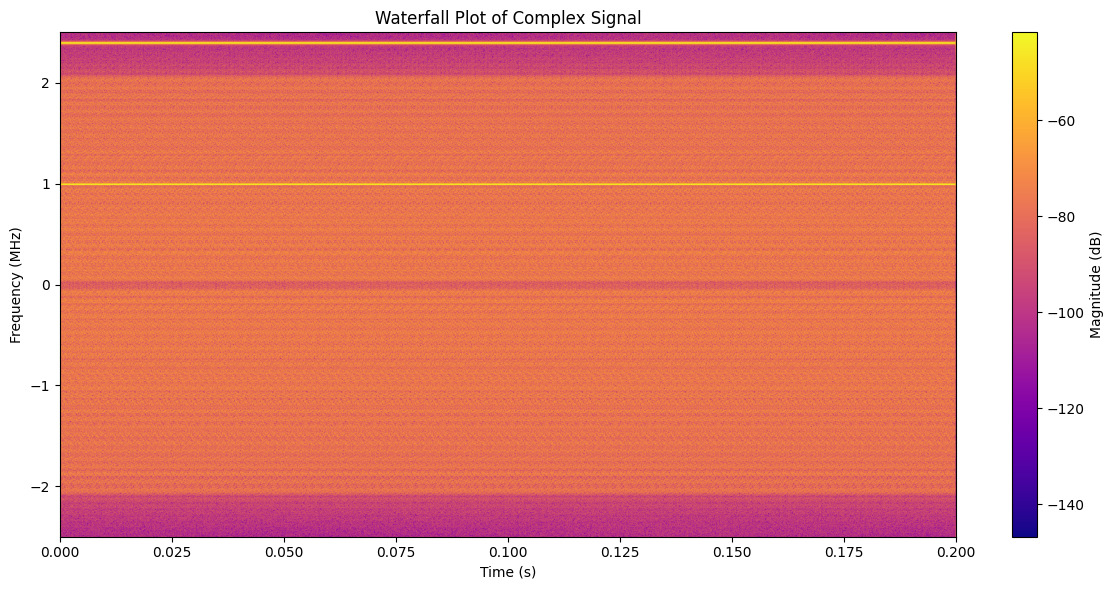

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.io import loadmat

def plot_waterfall(file_path, fs=5e6, nfft=1024, noverlap=512, freq_shift=0):
    """
    Plots a standard waterfall plot (STFT) of a complex signal.

    Parameters:
        file_path (str): Path to the .mat file containing the signal.
        fs (float): Sampling frequency of the signal (default: 5 MHz).
        nfft (int): Number of FFT points (default: 1024).
        noverlap (int): Overlap between segments (default: 512).
        freq_shift (float): Frequency shift to apply to the signal (in Hz, default: 0).
    """
    # Load the modified signal
    mat_data = loadmat(file_path)
    IQ_data = mat_data['f_sig'].flatten()

    # Trim the data for visualization if necessary
    IQ_data = IQ_data[:1000000]

    # Apply frequency shift if needed
    if freq_shift != 0:
        t = np.arange(len(IQ_data)) / fs  # Time vector
        IQ_data *= np.exp(1j * 2 * np.pi * freq_shift * t)

    # Compute the STFT (short-time Fourier transform)
    f, t, Zxx = stft(IQ_data, fs=fs, nperseg=nfft, noverlap=noverlap, return_onesided=False)

    # Convert to dB for better visualization
    Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-12)  # Avoid log of zero

    # Shift frequencies to be centered at 0
    f = np.fft.fftshift(f)
    Zxx_dB = np.fft.fftshift(Zxx_dB, axes=0)

    # Plot the waterfall
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f / 1e6, Zxx_dB, shading='gouraud', cmap='plasma')  # Use plasma for better contrast
    plt.colorbar(label='Magnitude (dB)')
    plt.title('Waterfall Plot of Complex Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (MHz)')
    plt.ylim(-fs / 2 / 1e6, fs / 2 / 1e6)  # Show full bandwidth (±fs/2)
    plt.tight_layout()
    plt.show()

# Example usage
file_path = "/home/sagetrudeau/Datasets/ORACLE/mat_files/raw/WiFi_air_X310_3123D58_14ft_run1"  # Adjust as needed
plot_waterfall(file_path, fs=5e6, nfft=1024, noverlap=512, freq_shift=0)

